# UMAP Dimensionality reduction on field recordings of acoustic events from 11 species of birds

Dataset from: https://zenodo.org/record/1250690#.YOs-bXUzbGK
We choose 2500 samples for this code
## 12 labels: 
### 0 to 10 labels - Great Blue Heron, American Crow, Cedar Waxwing, House Finch, Common Yellowthroat, Indigo Bunting, Chipping Sparrow, American Yellow, Warbler Marsh Wren, Blue Jay, Song Sparrow
### Label 11 -  unknown events

In [1]:
import matplotlib
import umap
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
import random
import os
#loaded libraries

In [2]:
num=[0] * 12
print(num)
for filen in range(12):
      onlyfiles = next(os.walk('/home/devanandt/Downloads/Bird12/'+ str(filen)+ '/'))[2]
      num[filen]=len(onlyfiles)
print(num)    
#estimated number of files from dataset and loaded those numbers to a list

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[246, 247, 247, 249, 249, 251, 252, 253, 253, 256, 259, 339]


In [3]:
nn=[]
#num=[135,315,339,402,441,335,235,310,142,217,94,256]
numsum=np.cumsum(num)
for y in range(12):
      for x in range(0,num[y]):
            string='/home/devanandt/Downloads/Bird12/'+ str(y)+ '/'+ str(x) +'.wav'
            samplerate, dat = wavfile.read(string)
            n=np.shape(dat)
            n=n[0]
            nn += [n]       
files=sum(num)
print(files)
#estimated the maximum length of vectors(from wav files) in the database(variable `nn`)

3101


In [4]:
id=np.zeros((files), dtype='int16')
ii=np.zeros((files), dtype='int16')
idcum=np.zeros((files), dtype='int16')

for jj in range(files):
      if (jj<numsum[0]):
          id[jj]=0
          idcum[jj]=jj 
      elif (jj>=numsum[0] and jj<numsum[1]):
          id[jj]=1
          idcum[jj]=jj-num[0]             
      elif (jj>=numsum[1] and jj<numsum[2]):
          id[jj]=2
          idcum[jj]=jj-sum(num[:2])           
      elif (jj>=numsum[2] and jj<numsum[3]):
          id[jj]=3
          idcum[jj]=jj-sum(num[:3])           
      elif (jj>=numsum[3] and jj<numsum[4]):
          id[jj]=4
          idcum[jj]=jj-sum(num[:4])                    
      elif (jj>=numsum[4] and jj<numsum[5]):
          id[jj]=5
          idcum[jj]=jj-sum(num[:5])                
      elif (jj>=numsum[5] and jj<numsum[6]):
          id[jj]=6
          idcum[jj]=jj-sum(num[:6])   
      elif (jj>=numsum[6] and jj<numsum[7]):
          id[jj]=7
          idcum[jj]=jj-sum(num[:7])                   
      elif (jj>=numsum[7] and jj<numsum[8]):
          id[jj]=8
          idcum[jj]=jj-sum(num[:8]) 
      elif (jj>=numsum[8] and jj<numsum[9]):
          id[jj]=9
          idcum[jj]=jj-sum(num[:9])              
      elif (jj>=numsum[9] and jj<numsum[10]):
          id[jj]=10        
          idcum[jj]=jj-sum(num[:10])               
      elif (jj>=numsum[10] and jj<numsum[11]):
          id[jj]=11
          ii[jj]=1
          idcum[jj]=jj-sum(num[:11])              

nsig=2500
#nsig is 2500 random vectors from the database for this code
s=random.sample(range(files), nsig)
print(idcum)
#idcum is ids specific to each subfolder in database
#id is the label of the data

[  0   1   2 ... 336 337 338]


In [5]:
nmax=np.amax(nn)
dat=np.zeros((len(s),nmax), dtype='float16')
#spectrogram=np.zeros((129,439,nsig))
c=np.zeros((len(s),1), dtype='int16')
idd=np.vstack((id,idcum))
i=0
for y in s:
      string='/home/devanandt/Downloads/Bird12/'+ str(idd[0,y])+ '/'+ str(idd[1,y]) +'.wav'
      samplerate, da = wavfile.read(string)
      da=da/np.max(da)
      dat[i,:]=np.pad(da, (0, nmax - len(da)), 'constant')
      #frequencies, times, spectrogram[:,:,i] = signal.spectrogram(dat[i,:], samplerate)  
      c[i]=y
      i=i+1
#spec=np.reshape(spectrogram,(nsig,129*439))
#Prepared data matrix from vectors, optionally spectrogram of data can be calculated

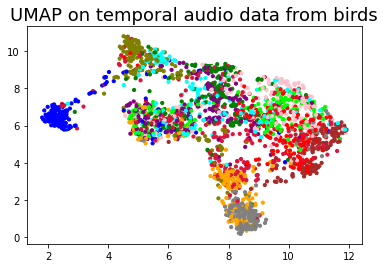

In [6]:
reducer = umap.UMAP(n_neighbors=8,min_dist=0.08,n_components=2,metric='correlation',n_epochs=50)
embedding = reducer.fit_transform(dat)

colors = ['blue', 'orange' , 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'crimson']
plt.scatter(embedding[:, 0], embedding[:, 1], c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)


plt.title("UMAP on temporal audio data from birds", fontsize=18)

plt.show()
#UMAP applied and plotted the results

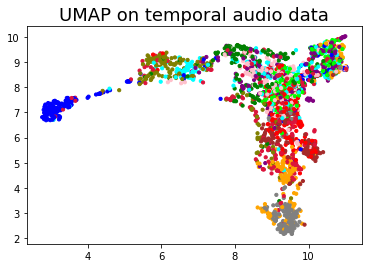

In [7]:
reducer = umap.UMAP(n_neighbors=6,min_dist=0.01,n_components=3,metric='correlation',n_epochs=100)
embedding = reducer.fit_transform(dat)

colors = ['blue', 'orange' , 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'crimson']
plt.scatter(embedding[:, 0], embedding[:, 1], c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)


plt.title("UMAP on temporal audio data", fontsize=18)

plt.show()
#UMAP applied and plotted the results